In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales = pd.read_csv(r"C:\Users\MAGOMA\Pictures\DATA SCIENCE\Data_Science Projects\Original dataset\sales_prediction\advertising.csv")

In [4]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# DATA CLEANING AND EXPLORATORY DATA ANALYSIS


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### From the above information

##### - We don't have null values.
##### - The data types are correct .

### Checking for duplicated rows

In [6]:
sales.duplicated().sum()

0

### Data Distributions

Text(0.5, 1.0, 'TV vs Sales')

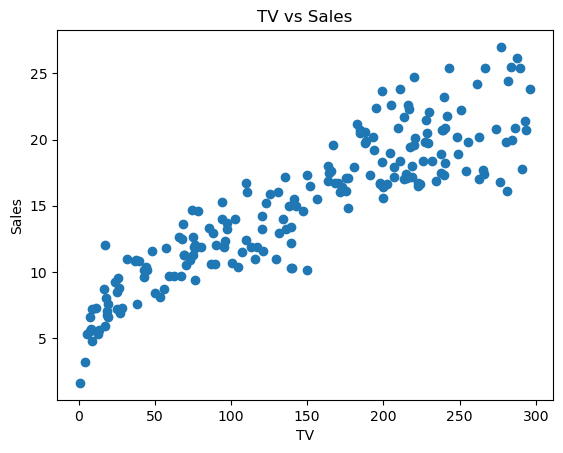

In [7]:
plt.scatter(sales.TV, sales.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

Text(0.5, 1.0, 'Radio vs Sales')

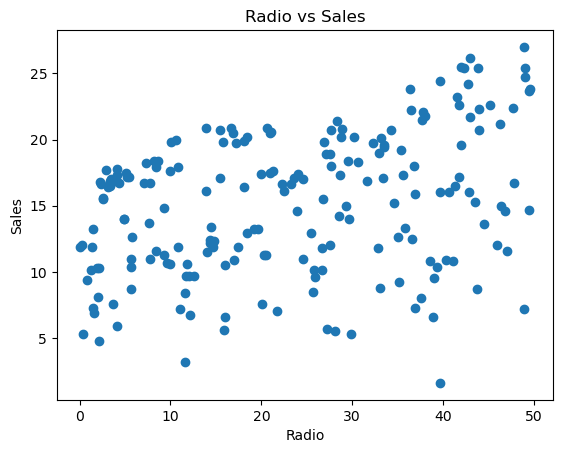

In [8]:
plt.scatter(sales.Radio, sales.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

Text(0, 0.5, 'Sales')

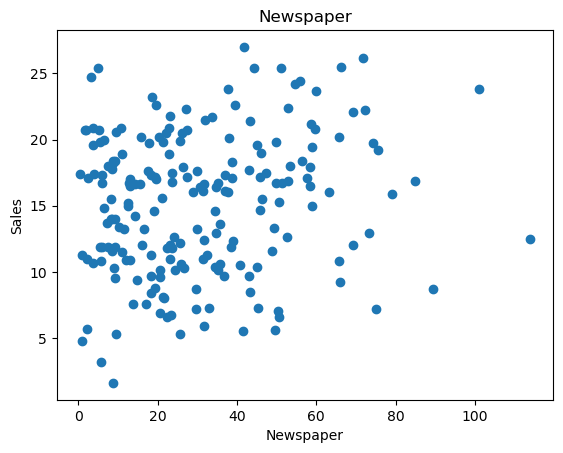

In [9]:
plt.scatter(sales.Newspaper, sales.Sales)
plt.title('Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

### Selecting features to explore

In [10]:
 feat = sales[['TV', 'Radio', 'Newspaper', 'Sales']]

### Splitting sales dataset into 80% training set and 20% testing set

In [11]:
# Creating a mask to select random rows using np.random.rand() function
# Creating train and test data

mask = np.random.rand(len(sales)) < 0.8
train = feat[mask]
test = feat[~mask]

### Train data distribution 
##### TV vs Sales

Text(0, 0.5, 'Sales')

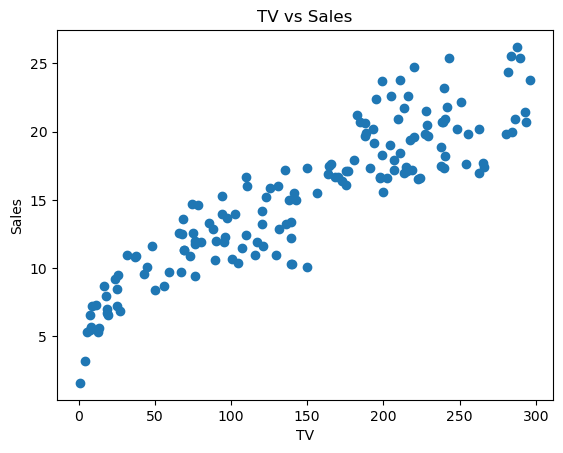

In [29]:
plt.scatter(train.TV, train.Sales)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# MODELLING

#### TV Vs Sales

In [34]:
# Using sklearn package to model the data

from sklearn import linear_model
reg = linear_model.LinearRegression()

train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['Sales']])

# Training the model

reg.fit(train_x, train_y)

print('predicted : ', reg.predict([[17.2]]))

predicted :  [[7.90826367]]


In [18]:
# coefficients

print('coefficient : ', reg.coef_)
print('intercept : ', reg.intercept_)

coefficient :  [[0.05480305]]
intercept :  [6.96565119]


### Plotting the outputs

Text(0, 0.5, 'Sales')

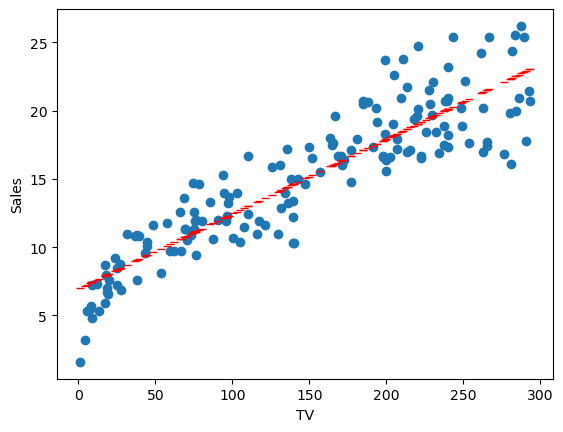

In [19]:
plt.scatter(train.TV, train.Sales)
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '_r')
plt.xlabel('TV')
plt.ylabel('Sales')

In [22]:
# x_train
radio = np.asanyarray(sales[['Radio']])
# y_train
sale = np.asanyarray(sales[['Sales']])

# Training the model
reg.fit(radio, sale)

LinearRegression()

In [24]:
print('Coefficient : ', reg.coef_)
print('Intercept : ', reg.intercept_)

Coefficient :  [[0.12443166]]
Intercept :  [12.23572197]


#### Outputs

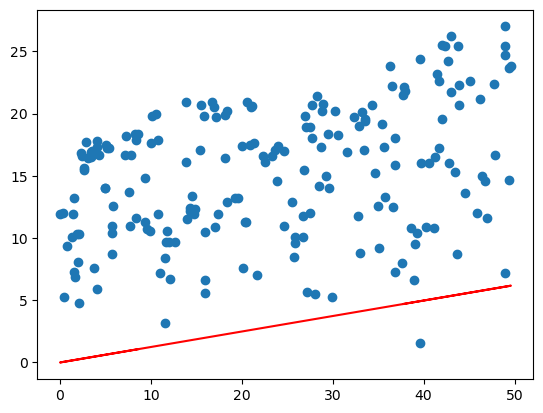

In [30]:
plt.scatter(sales.Radio, sales.Sales)
plt.plot(radio, reg.coef_[0][0]*radio, reg.intercept_[0], color='r')

# EVALUATION

In [20]:
# We compare actual values and predicted values to calculate the accuracy of a regression model

# We chose to use MSE to calculate the accuracy of our model based on the test set

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['Sales']])
testY = reg.predict(test_x)

# MSE 

print('MSE : %.2f' % np.mean(testY - test_y)**2)

# MAE

print('MAE : %.2f' % np.mean(np.absolute(testY - test_y)))

# We measure the performance of the regression model with R-squared

print('R2-score : %.2f' % r2_score(test_y, testY))


MSE : 0.30
MAE : 1.79
R2-score : 0.82


##### R-score shows that the data points are closer to the fitted regression line and again it shows that the model fits our data

# MULTIPLE REGRESSION MODEL

In [36]:
x = np.asanyarray(train[['TV', 'Radio', 'Newspaper']])
y = np.asanyarray(train[['Sales']])
reg.fit(x,y)

# Finding the coefficients of all the independent variables

print('coefficients : ', reg.coef_)

coefficients :  [[ 0.05419212  0.1024946  -0.00014766]]


### Predictions

In [46]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_hat = reg.predict(x)
x_test = np.asanyarray(test[['TV', 'Radio', 'Newspaper']])
y_test = np.asanyarray(test[['Sales']])


In [48]:
y_hat[0:5]

array([[21.08101263],
       [11.1802558 ],
       [17.18182311],
       [15.64358175],
       [10.21971105]])